### 组合图的绘制

plt.subplot2grid(shape, loc, rowspan=1, colspan=1, **kwargs)

- shape：指定组合图的框架形状，以元组形式传递，如2×3的矩阵可以表示成(2,3) 
- loc：指定子图所在的位置，如shape中第一行第一列可以表示成(0,0) 
- rowspan：指定某个子图需要跨几行 
- colspan：指定某个子图需要跨几列

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Trade = pd.read_excel(r'.\data\Prod_Trade.xlsx')       
Trade

,Date,Order_Class,Sales,Transport,Trans_Cost,Region,Category,Box_Type
0,2010-10-13,低级,261.5400,火车,35.00,华北,办公用品,大型箱子
1,2012-02-20,其它,6.0000,火车,2.56,华南,办公用品,小型包裹
2,2011-07-15,高级,2808.0800,火车,5.81,华南,家具产品,中型箱子
3,2011-07-15,高级,1761.4000,大卡,89.30,华北,家具产品,巨型纸箱
4,2011-07-15,高级,160.2335,火车,5.03,华北,技术产品,中型箱子
...,...,...,...,...,...,...,...,...
8563,2012-11-15,高级,18.9100,火车,7.01,华东,办公用品,小型箱子
8564,2012-11-15,高级,685.7000,火车,20.79,华南,家具产品,大型箱子
8565,2012-11-15,高级,1024.1650,火车,5.99,华南,技术产品,小型箱子
8566,2009-01-23,中级,1383.2000,火车,12.14,华南,技术产品,小型箱子


In [ ]:
#设置子图布局
plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid(shape=(2,3),loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,3),loc=(0,1))
ax3 = plt.subplot2grid(shape=(2,3),loc=(0,2),rowspan=2)
ax4 = plt.subplot2grid(shape=(2,3),loc=(0,0),colspan=2)

plt.rcParams['font.family']=['SimHei']

Text(0.5, 1.0, '各等级订单比例')

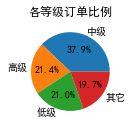

In [2]:
plt.rcParams['font.family']=['SimHei']
ax1 = plt.subplot2grid(shape=(2,3),loc=(0,0))
#提取出年份和月份字段
Trade['year']=Trade.Date.dt.year
Trade['month']=Trade.Date.dt.month

#统计2012年各订单等级的数量
Class_Counts = Trade.Order_Class[Trade.year==2012].value_counts()
Class_Percent = Class_Counts/Class_Counts.sum()

#绘制订单等级饼图
ax1.pie(x=Class_Counts,labels = Class_Percent.index,autopct='%.1f%%')
#添加标题
ax1.set_title('各等级订单比例')

Text(0.5, 0, '')

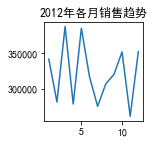

In [3]:
ax2 = plt.subplot2grid(shape=(2,3),loc=(0,1))
plt.rcParams['font.family']=['SimHei']
#统计2012年每月销售额
Month_Sales = Trade[Trade.year==2012].groupby(by='month').agg({'Sales':np.sum})
# Month_Sales.pivot_table(index='month',values='Sales',aggfunc==np.sum)

#绘制销售额趋势图
Month_Sales.plot(title = '2012年各月销售趋势', ax = ax2, legend = False)
#删除X轴标签
ax2.set_xlabel('')

Text(0, 0.5, '运输成本')

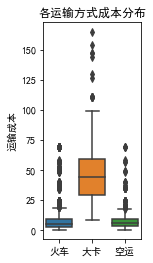

In [8]:
plt.rcParams['font.family']=['SimHei']
ax3 = plt.subplot2grid(shape=(2,3),loc=(0,2),rowspan=2)
#绘制各运输方式的成本箱线图
sns.boxplot(x='Transport',y='Trans_Cost',data=Trade,ax=ax3)
#添加标题
ax3.set_title('各运输方式成本分布')
#删除x轴标签
ax3.set_xlabel('')
#设置y轴标签
ax3.set_ylabel('运输成本')

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


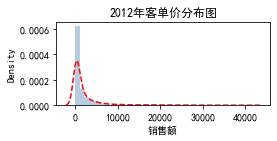

In [5]:
plt.rcParams['font.family']=['SimHei']
# 设置第四个子图的布局
ax4 = plt.subplot2grid(shape = (2,3), loc = (1,0), colspan = 2)
# 2012年客单价分布直方图
sns.distplot(Trade.Sales[Trade.year == 2012], bins = 40, norm_hist = True, ax = ax4, hist_kws = {'color':'steelblue'}, kde_kws=({'linestyle':'--', 'color':'red'}))
# 添加标题
ax4.set_title('2012年客单价分布图')
# 修改x轴标签
ax4.set_xlabel('销售额')
# 调整子图之间的水平间距和高度间距
plt.subplots_adjust(hspace=0.6, wspace=0.3)
# 图形显示
plt.show()